In [4]:
while True:
    dan = eval(input("enter the table:"))
    
    if 1 < dan < 9:
        for i in range(1, 10):
            print(dan, 'x', i, '=', dan*i)
    
    elif dan == 0:
        break
    
    else:
        print('Please enter the correct number(2~9)')

3 x 1 = 3
3 x 2 = 6
3 x 3 = 9
3 x 4 = 12
3 x 5 = 15
3 x 6 = 18
3 x 7 = 21
3 x 8 = 24
3 x 9 = 27
Please enter the correct number(2~9)


In [3]:
#회귀분석
#문제1) 통계적으로 유의한가?
## 귀무가설: 전기생산량과 전기소비량 간의 상관관계가 없다
## 대립가설: 상관관계가 있다

#월별 전기 생산금액
X =[3.52,2.58,3.31,4.07,4.62,3.98,4.29, 4.83, 3.71, 4.61, 3.90,3.20]

#월별 전기 사용량
y =[2.48,2.27,2.47,2.77,2.98,3.05,3.18, 3.46, 3.03, 3.25, 2.67,2.53]

#선형회귀분석
from scipy import stats
result = stats.linregress(X, y)
print(result)

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)


In [11]:
# pvalue는 0.000092...
# pvalue가 0.05보다 작기 때문에 대립가설을 채택함(상관관계가 있다)
# 이 분석은 통계학적으로 유의미함
pvalue = 9.238421943157891e-05
print(format(pvalue, '.6f'))

0.000092


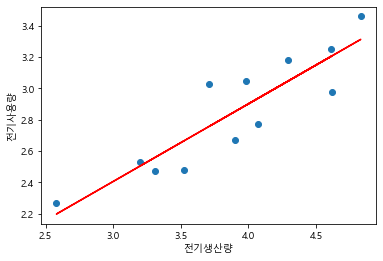

In [20]:
#문제2) 전기 생산량이 4.5일 때, 전기 사용량은 얼마인가?

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#한글처리
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf')\
    .get_name()
rc('font', family=font_name)

#생산량 예측을 위해 그래프 그리기
#기울기, 절편, rvalue, pvalue, 에러의 표준편차 계산
slope, intercept, r_value, p_value, stderr = stats.linregress(X,y)
X1 = np.array(X)
#산점도 그리기
plt.scatter(X,y)
#회귀선 그리기
plt.plot(X1, slope*X1 + intercept, c='red')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')

plt.show()

In [21]:
#생산량이 4.5일 경우, 소비량 예측
ans = 4.5 * slope + intercept
ans

3.149795990151249

In [ ]:
#지하철교통량정보가 저장된 c:/data/traffic/data.csv 파일의 내용 중에서
#‘12월’ 필드의 값이 100만 이상인 레코드만을 mysql 테이블에 저장하는
# python 코드를 작성합

In [32]:
import csv
import MySQLdb

input_file = 'c:/data/traffic/data.csv'
conn  = MySQLdb.connect(host='localhost', port=3306, \
    db = 'traffic', user='web', passwd='1234', charset='utf8')
cursor = conn.cursor()
file_reader = csv.reader(open(input_file))
header = next(file_reader)
for row in file_reader:
    data=[]
    for idx in range(len(header)):
        data.append(row[idx])
    print(data)
    cursor.execute('''insert into traffic values
    (%s,%s,%s,%s)''',data)
conn.commit()
cursor.execute('select line, station_number, station_name, months12 from traffic where months12 > 1000000')
rows = cursor.fetchall()
for row in rows:
    output=[]
    for idx in range(len(row)):
        output.append(str(row[idx]))
    print(output)

['1', '150', '서울역(1)', '2823972', '2542481', '2885932', '2918104', '2993718', '2770656', '2864737', '2846034', '2697337', '3014329', '2938518', '2966572']


ProgrammingError: not all arguments converted during bytes formatting

In [23]:
header

['호선',
 '역번호',
 '역      명',
 '1월',
 '2월',
 '3월',
 '4월',
 '5월',
 '6월',
 '7월',
 '8월',
 '9월',
 '10월',
 '11월',
 '12월']

In [27]:
output_file = 'c:/data/traffic/data2.csv'
cursor = conn.cursor()
filewriter = csv.writer(open(output_file, 'w'))
header = ['호선', '역번호','역      명', '12월']
filewriter.writerow(header)
cursor.execute('select line, station_number, station_name, months12 from traffic where months12 > 1000000')
rows = cursor.fetchall()
for row in rows:
    filewriter.writerow(row)

In [29]:
row

('9', '4129', '봉은사', '1250626')

In [ ]:
#붓꽃 품종 분류
# setosa와 virginica 2가지 품종만 사용
# 품종별 샘플 개수를 카운트 플롯으로 화면에 출력
# 로지스틱 회귀분석 사용
# 비율은 8:2
# 예측정확도와 오분류표 출력

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv('c:/data/iris/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
#2가지 품종(setosa와 virginica)만 사용
df = df[df.Name != 'versicolor']

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa 1: virginica)')

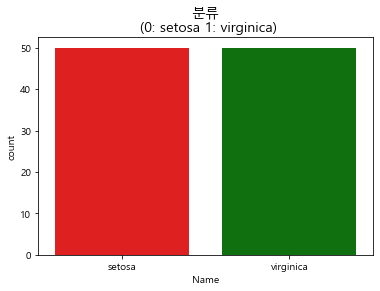

In [5]:
#품종별 샘플 개수
import seaborn as sns

colors = ['red', 'green']
sns.countplot('Name', data=df, palette=colors)
plt.title('분류\n (0: setosa 1: virginica)', fontsize=14)

In [7]:
#로지스틱 회귀분석
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
#정확도
print('학습용:', model.score(X_train, y_train))
print('검증용:', model.score(X_test, y_test))

학습용: 1.0
검증용: 1.0


In [17]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[10,  0],
       [ 0, 10]], dtype=int64)

<AxesSubplot:title={'center':'confusion_matrix'}>

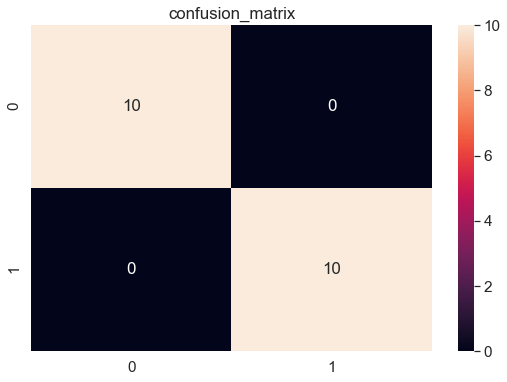

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('confusion_matrix')
sns.heatmap(cm, annot=True)

In [21]:
#예측
import numpy as np

samp1 = np.array([5.1,3.5,1.4,0.2])
samp2 = np.array([4.7,3.2,1.3,0.2])

samples = np.array([samp1, samp2])
print(model.predict(samples))

[0 0]
